In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [37]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [74]:
print dataset.head((100))

    sepal-length  sepal-width  petal-length  petal-width            class
0            5.1          3.5           1.4          0.2      Iris-setosa
1            4.9          3.0           1.4          0.2      Iris-setosa
2            4.7          3.2           1.3          0.2      Iris-setosa
3            4.6          3.1           1.5          0.2      Iris-setosa
4            5.0          3.6           1.4          0.2      Iris-setosa
5            5.4          3.9           1.7          0.4      Iris-setosa
6            4.6          3.4           1.4          0.3      Iris-setosa
7            5.0          3.4           1.5          0.2      Iris-setosa
8            4.4          2.9           1.4          0.2      Iris-setosa
9            4.9          3.1           1.5          0.1      Iris-setosa
10           5.4          3.7           1.5          0.2      Iris-setosa
11           4.8          3.4           1.6          0.2      Iris-setosa
12           4.8          3.0         

In [7]:
print dataset.shape

(150, 5)


In [9]:
print dataset.describe()

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [11]:
print dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


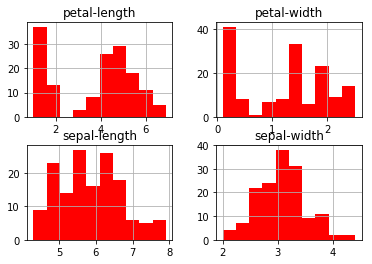

In [13]:
dataset.hist(color='red')
plt.show()

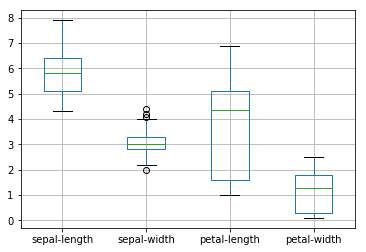

In [14]:
dataset.boxplot()
plt.show()

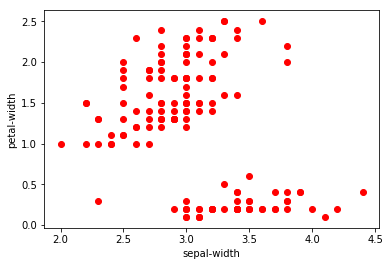

In [32]:
c=plt.figure()
d=c.add_subplot(1,1,1)
d.set_xlabel('sepal-width')
d.set_ylabel('petal-width')
d.scatter(dataset['sepal-width'],dataset['petal-width'],color='red')
plt.show()

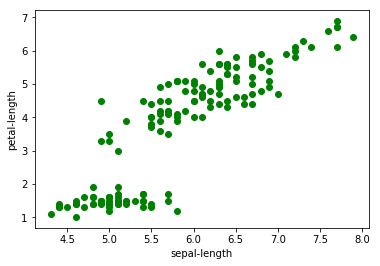

In [33]:
a=plt.figure()
b=a.add_subplot(1,1,1)
b.set_xlabel('sepal-length')
b.set_ylabel('petal-length')
b.scatter(dataset['sepal-length'],dataset['petal-length'],color='green')


plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.metrics import classification_report


In [66]:
array=dataset.values
X=array[:,0:4]
Y=array[:,4]
seed=7
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=seed)

In [52]:
print X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

(112L, 4L) (112L,) (38L, 4L) (38L,)


In [67]:
algos=[]
results=[]
names=[]
algos.append(('LREG',LogisticRegression()))
algos.append(('DT',DecisionTreeClassifier()))
algos.append(('KNN',KNeighborsClassifier()))
algos.append(('NB',GaussianNB()))
algos.append(('SVM',SVC()))
algos.append(('RF',RandomForestClassifier()))
for name,algo in algos:
    folds=model_selection.KFold(n_splits=7,random_state=seed)
    result=model_selection.cross_val_score(algo,X_train,Y_train,cv=folds)
    results.append(result)
    names.append(name)
    msg = "%s: %f " % (name, result.mean())
    print msg

LREG: 0.955357 
DT: 0.973214 
KNN: 0.973214 
NB: 0.982143 
SVM: 0.991071 
RF: 0.964286 


In [79]:
svm=SVC()
svm.fit(X_train,Y_train)
predict=svm.predict(X_test)
print accuracy_score(Y_test,predict)
print confusion_matrix(Y_test,predict)
print classification_report(Y_test,predict)

0.947368421053
[[11  0  0]
 [ 0 12  2]
 [ 0  0 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.87      1.00      0.93        13

    avg / total       0.95      0.95      0.95        38

